In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
    import warnings
    warnings.filterwarnings('ignore')

In [70]:
# Load the Dataset
amazon_df = pd.read_csv("Amazon Sale Report.csv")

**Phase 1: Initital Data Exploration**

In [71]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [72]:
amazon_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [73]:
amazon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [74]:
# Check for missing values
print(amazon_df.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [75]:
    amazon_df.nunique().to_frame("Unique_count")

,Unique_count
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [76]:
amazon_df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


**Data Cleaning**

In [77]:
amazon_df.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

Droppping Duplicates

In [78]:
amazon_df[amazon_df.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [79]:
len(amazon_df)-len(amazon_df.drop_duplicates(['Order ID','ASIN']))

7

In [80]:
amazon_df.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

Filling NAN Values

In [81]:
amazon_df['Courier Status'].fillna('unknown',inplace=True)

In [82]:
amazon_df['promotion-ids'].fillna('no promotion',inplace=True)

In [83]:
amazon_df[amazon_df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [84]:
amazon_df['Amount'].fillna(0,inplace=True)

In [85]:
amazon_df['ship-city'].fillna('unknown', inplace = True)
amazon_df['ship-state'].fillna('unknown', inplace = True)
amazon_df['ship-postal-code'].fillna('unknown', inplace = True)

In [86]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 
          'promotion-ids':'promotion','B2B':'customer_type'}

In [87]:
amazon_df.rename(columns=mapper, inplace =True)

Convert Amount column values to $

In [88]:
# Convert INR to USD using an exchange rate of 1 INR = 0.012 USD
exchange_rate = 0.012
amazon_df['order_amount_($)'] = amazon_df['order_amount_($)'].apply(lambda x: x * exchange_rate)

Convert B2B column values

In [89]:
amazon_df['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

Creating Datetime and adding Month column

In [90]:
amazon_df['date'] = pd.to_datetime(amazon_df['date'])

In [91]:
# Filter to only include dates in March
march_dates = amazon_df['date'][amazon_df['date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()

1

In [92]:
# dropping March dates from the dataset
amazon_df = amazon_df[(amazon_df['date'].dt.month != 3)]

In [93]:
amazon_df['month'] = amazon_df['date'].dt.month
amazon_df["month"].unique()

array([4, 5, 6])

In [94]:
month_map = { 4: 'april',5: 'may',6: 'june'}
amazon_df['month'] = amazon_df['date'].dt.month.map(month_map)

In [95]:
# Define the desired order of months
month_order = ['april', 'may', 'june']

# Convert the month column to a categorical data type with the desired order
amazon_df['month'] = pd.Categorical(amazon_df['month'], categories=month_order, ordered=True)

In [96]:
print(f'This dataset contains the months {amazon_df["month"].unique()} for 2022')
print(f'The earliest date is {amazon_df["date"].min()}')
print(f'The latest date is {amazon_df["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


Column Value Ordering

In [97]:
# Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
amazon_df['size'] = pd.Categorical(amazon_df['size'], categories=size_order, ordered=True)

# Data Visualizations

Checking The Clean Data

In [98]:
amazon_df.describe(include='all')

,order_ID,date,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,order_amount_($),city,state,zip,promotion,customer_type,month
count,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797.000000,128797.000000,128797,128797,128797.0,128797,128797,128797
unique,120220,NaN,13,2,2,1377,7194,9,11,7189,4,NaN,NaN,8953,70,9460.0,5784,2,3
top,171-5057375-2831560,NaN,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer,april
freq,12,NaN,77664,89543,88460,4221,772,50206,22679,772,109331,NaN,NaN,11200,22235,1004.0,49088,127926,49065
mean,NaN,2022-05-12 13:11:06.099365632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904439,7.312705,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.956000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.996480,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.252000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,67.008000,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
amazon_df.isnull().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
service_level          0
style                  0
sku                    0
product_category       0
size                   0
asin                   0
courier_ship_status    0
order_quantity         0
order_amount_($)       0
city                   0
state                  0
zip                    0
promotion              0
customer_type          0
month                  0
dtype: int64

In [100]:
amazon_df.nunique().to_frame(name='Count of unique values')

,Count of unique values
order_ID,120220
date,90
ship_status,13
fullfilment,2
service_level,2
style,1377
sku,7194
product_category,9
size,11
asin,7189


In [101]:
amazon_df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fullfilment,"[Merchant, Amazon]"
service_level,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
product_category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."
asin,"[B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7..."


Preliminary Insights

In [102]:
revenue_by_month = amazon_df.groupby('month')['order_amount_($)'].sum()
percent_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april'] * 100
percent_decrease_may_to_jun = (revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may'] * 100
total_decrease = (revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april'] * 100
print("_______________________________________________________")
print(f"Total revenue for April 2022: ${revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: ${revenue_by_month['may']:,.2f}, which is a -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ${revenue_by_month['june']:,.2f}, which is a -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")
print("_______________________________________________________")
print("\n")
print("_______________________________________________________")
revenue_by_category = amazon_df.groupby('product_category')['order_amount_($)'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "${:,.2f}".format(x)))
print("_______________________________________________________")
print("\n")

print("_______________________________________________________")
revenue_by_category = amazon_df.groupby('product_category')['order_amount_($)'].sum()
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)
print("_______________________________________________________")
print("\n")

print("_______________________________________________________")
avg_price_by_category = amazon_df.groupby('product_category')['order_amount_($)'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))
print("_______________________________________________________")
print("\n")

print("_______________________________________________________")
cancelled_orders = amazon_df[amazon_df['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = amazon_df[amazon_df['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled / len(amazon_df) * 100
percent_returned = total_returned / len(amazon_df) * 100
percent_cancelled_returned = total_cancelled_returned / amazon_df['order_quantity'].sum() * 100
print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")
print("_______________________________________________________")
print("\n")


print("_______________________________________________________")
monthly_order_data = amazon_df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'mean', 'order_quantity': 'mean'})
monthly_order_data = monthly_order_data.rename(columns={'order_amount_($)': 'average_order_amount', 'order_quantity': 'average_order_quantity'})
print(monthly_order_data)
print("_______________________________________________________")
print("\n")

print("_______________________________________________________")
popular_category_by_state = amazon_df.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)
print("_______________________________________________________")
print("\n")

print("_______________________________________________________")
avg_order_amount_by_customer_type = amazon_df.groupby('customer_type')['order_amount_($)'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "${:,.2f}".format(x)))
print("_______________________________________________________")

_______________________________________________________
Total revenue for April 2022: $346,064.50
Total revenue for May 2022: $314,694.21, which is a -9.06% decrease from April.
Total revenue for June 2022: $281,095.76, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%
_______________________________________________________


_______________________________________________________
Total revenue by product category:
product_category
Set              $469,777.66
kurta            $255,171.24
Western Dress    $134,501.03
Top               $64,119.38
Ethnic Dress       $9,481.42
Blouse             $5,497.54
Bottom             $1,808.02
Saree              $1,487.21
Dupatta               $10.98
Name: order_amount_($), dtype: object
_______________________________________________________


_______________________________________________________
Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western 

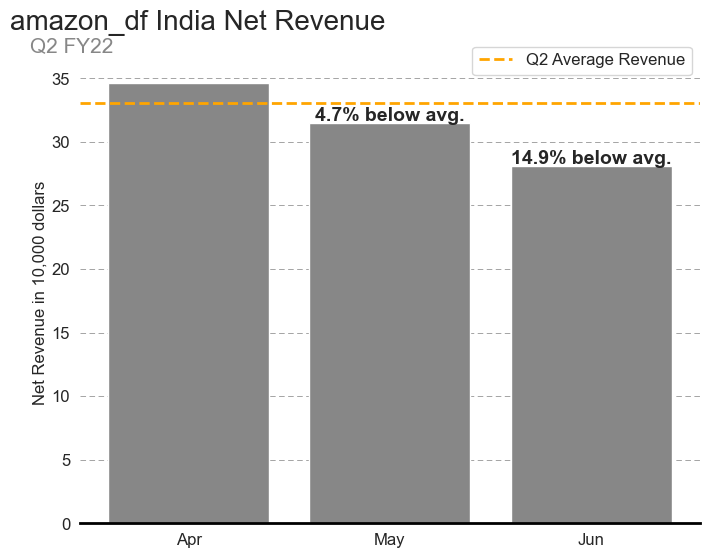

In [103]:
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

# Group the data by month and calculate the total sales revenue
monthly_sales = amazon_df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum'})

# Get latest month revenue and average quarterly revenue
latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean()[0]

# Compute percentage below average revenue for quarter
pct_below_avg = round((1 - (latest_month_revenue / avg_quarterly_revenue)) * 100, 1)

# Plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount_($)'], color='#878787')

# Add label above each bar with the percentage below the average revenue for the quarter
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales.iloc[i]['order_amount_($)']
    pct_below_avg = round((1 - (month_sales / avg_quarterly_revenue)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()-7000), 
                xytext=(0, 5), textcoords='offset points',  fontweight='bold', 
                ha='center', va='bottom', fontsize=14)

# Add label above the latest bar with the percentage below the average revenue for the quarter
latest_bar = bars[-1]
latest_month_sales = latest_bar.get_height()
pct_below_avg = round((1 - (latest_month_sales / avg_quarterly_revenue)) * 100, 1)
ax.annotate(f'{pct_below_avg}% below avg.', 
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height()-7000), 
            xytext=(0, 5), textcoords='offset points',  fontweight='bold',
            ha='center', va='bottom', fontsize=14)

# Add horizontal line at the average quarterly revenue
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange',linewidth=2, label='Q2 Average Revenue')

ax.set_title('amazon_df India Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

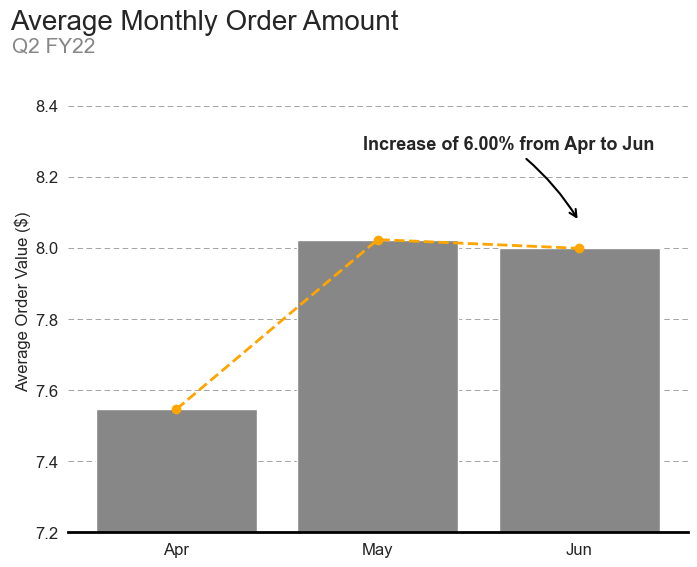

In [104]:
# Group the data by month and calculate the average order value
monthly_aov = amazon_df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum', 'order_ID': 'nunique'})
monthly_aov['average_order_value'] = monthly_aov['order_amount_($)'] / monthly_aov['order_ID']

# Calculate percent change from previous month
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100

# Create a barplot of the average order value per month
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'), y=monthly_aov['average_order_value'], ax=ax, color='#878787')

# Add line plot of the average order value per month
ax.plot(monthly_aov.index.strftime('%b'), monthly_aov['average_order_value'], linestyle='--', linewidth=2, color='orange', marker='o')


# Add callout for percent increase from April to June
apr_val = monthly_aov['average_order_value'][0]
jun_val = monthly_aov['average_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',fontweight='bold', xy=(2,8.074941567466606), xytext=(1.65, 8.264941567466606), fontsize=13, ha='center', va='bottom', arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=-0.1"))

# Set labels and title
ax.set_title('Average Monthly Order Amount', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Average Order Value ($)', fontsize=12, labelpad=3)
ax.set_ylim(7.20, 8.50)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()

C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\659788371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'])
C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\659788371.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['month'] = sales_data['date'].dt.month_name()


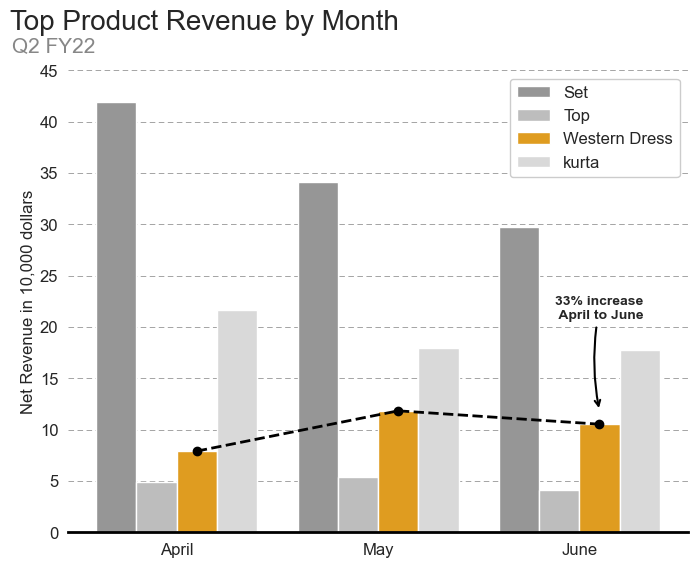

In [109]:
fig, ax = plt.subplots(figsize=(8,6))

# Define the desired order of months
month_order = ['April', 'May', 'June']

# Filter the data to only include the four product categories of interest
sales_data = amazon_df[amazon_df['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]

# Convert the date column to a datetime object
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract the month from the date column and set it as a new column
sales_data['month'] = sales_data['date'].dt.month_name()

# Aggregate the sales data by month and product category
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount_($)'].sum().reset_index()

# Convert the month column to a categorical data type with the desired order
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

# Plot the sales data using seaborn
ax = sns.barplot(x='month', y='order_amount_($)', hue='product_category', data=sales_by_month,
                 palette=['#969696', '#bdbdbd', 'orange', '#d9d9d9'])

# Extract the sales data for Western Dress
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Western Dress'].reset_index(drop=True)
sales_wd['month'] = pd.Categorical(sales_wd['month'], categories=month_order, ordered=True)
sales_wd.sort_values(by='month',inplace=True)
# Add line plot for total monthly revenue of Western Dress
ax.plot([0.1,1.1,2.1], sales_wd['order_amount_($)'], color='black', linestyle='--', linewidth=2, marker='o')


# Add annotation for percent increase from April to June for Western Dress
pct_increase = (sales_wd.loc[1, 'order_amount_($)'] - sales_wd.loc[0, 'order_amount_($)']) / sales_wd.loc[0, 'order_amount_($)'] * 100
ax.annotate(f'{pct_increase:.0f}% increase\n April to June',fontweight='bold', xy=(2.1, sales_wd.loc[2, 'order_amount_($)']), xytext=(1.88, sales_wd.loc[2, 'order_amount_($)'] + 40000),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=0.1"))


# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)


# Add title and axis labels
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)

plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)

ax.set_xlabel(None)
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')


# Show the plot
plt.show()
fig.savefig('Avg_MOV.png', dpi=300)

C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\4088139696.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)


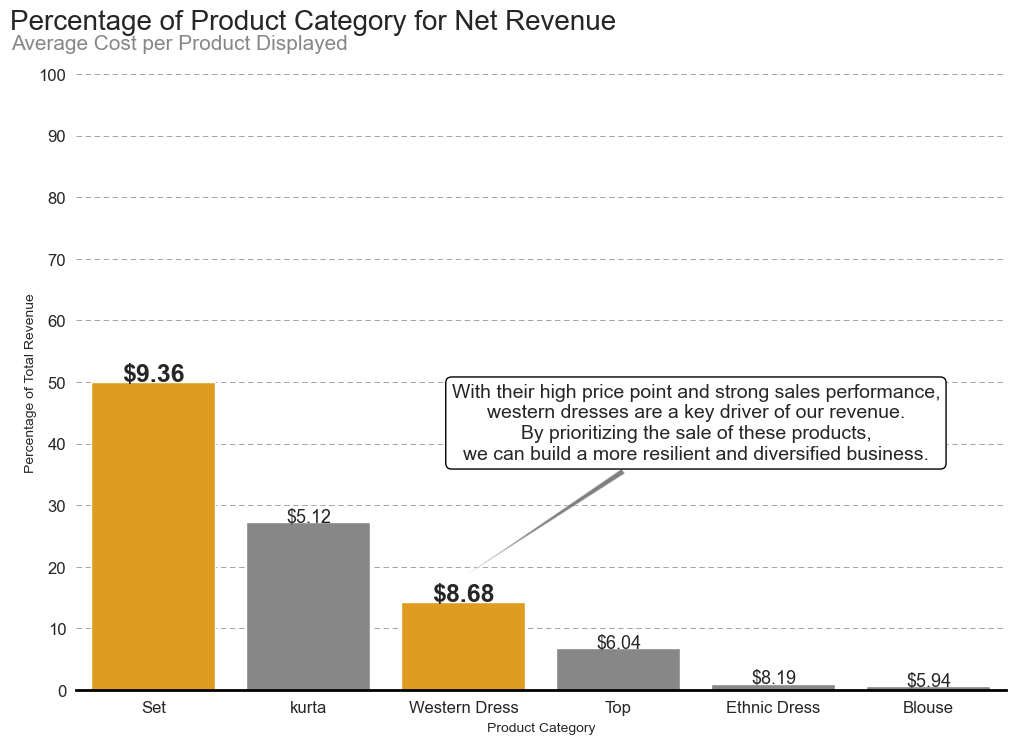

In [106]:
# Group the data by product category and calculate the total sales
sales_by_category = amazon_df.groupby('product_category')['order_amount_($)'].sum()

# Filter the categories to include
included_categories = ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse']
sales_by_category = sales_by_category.loc[included_categories]

# Calculate the total revenue
total_revenue = sales_by_category.sum()

# Calculate the percentage of total revenue for each category
sales_by_category_pct = (sales_by_category / total_revenue) * 100

# Sort the categories by total sales
sales_by_category_pct = sales_by_category_pct.sort_values(ascending=False)

# Create a bar chart to show the sales by product category
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['orange' if cat in ['Set', 'Western Dress'] else '#878787' for cat in sales_by_category_pct.index]
sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)

# Set font sizes for x and y labels, title, and ticks
# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = list(range(0,101,10))#np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)

ax.set_ylabel('Percentage of Total Revenue', labelpad=1)
ax.set_ylim(0, 100)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category for Net Revenue', fontsize=20, x=0.255, y=1.05, pad=10)
ax.text(-.07, 1.04, 'Average Cost per Product Displayed', fontsize=15, color='#878787', transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=12)
#ax.set_yticklabels(list(range(0,101,10)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# Set font sizes for the bars and add annotations for Set, kurta, and Western Dress
for i, category in enumerate(sales_by_category_pct.index):
    avg_cost = amazon_df[amazon_df['product_category'] == category]['order_amount_($)'].mean()
    if category in ['Set', 'Western Dress']:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'${avg_cost:.2f}', ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'${avg_cost:.2f}', ha='center', fontsize=13)


# Add a callout to emphasize the importance of western dresses for diversifying revenue
western_sales = sales_by_category_pct['Western Dress']
western_index = sales_by_category_pct.index.get_loc('Western Dress')

# Define the callout box properties
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1)
arrow_props = dict(facecolor='black', arrowstyle='wedge', alpha=0.5)

# Set the position of the callout box
x_pos = western_index
y_pos = western_sales + 2
x_text = x_pos + 0.5
y_text = y_pos - 8

# Calculate the percentage of revenue from western dresses
western_pct = (western_sales / total_revenue) * 100

# Add the callout box to the plot
ax.annotate('With their high price point and strong sales performance,\nwestern dresses are a key driver of our revenue.\nBy prioritizing the sale of these products,\nwe can build a more resilient and diversified business.', xy=(x_pos, y_pos+2), xytext=(x_text+1, y_text+35), fontsize=14,
arrowprops=arrow_props, bbox=bbox_props, ha='center', va='center')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Percent_Prod_Revenuw.png', dpi=300)

C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\1656169586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = amazon_df.groupby('size')['order_amount_($)'].sum()
C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\1656169586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)
C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\1656169586.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(range(0,20,2)))


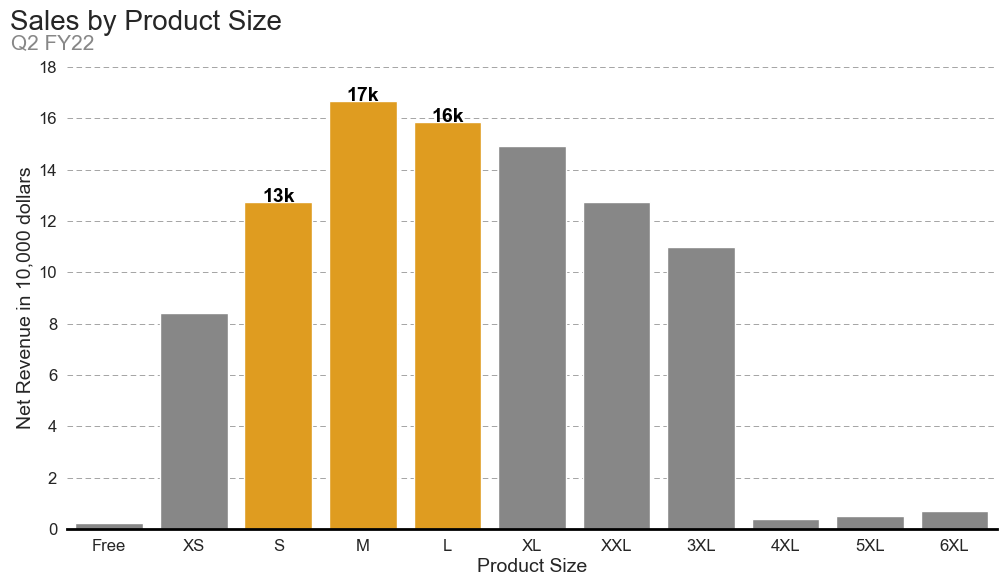

In [110]:
# Group the data by product size and calculate the total sales
sales_by_size = amazon_df.groupby('size')['order_amount_($)'].sum()

# Create a horizontal bar chart to show the sales by product size
fig, ax = plt.subplots(figsize=(12,6))

# Use a color palette to highlight specific sizes
palette_colors = ['orange' if size in ['S', 'M', 'L'] else '#878787' for size in sales_by_size.index]
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)


# Set font sizes for x and y labels, title, and ticks
ax.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax.set_ylabel('Net Revenue in 10,000 dollars', labelpad=3, fontsize=14)
ax.set_yticklabels(list(range(0,20,2)))
ax.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
#ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)


ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)

# Set font sizes for the bars and add annotations for S, M, and L sizes
for i, size in enumerate(sales_by_size.index):
    if size in ['S', 'M', 'L']:
        ax.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]/10000:.0f}k', ha='center', fontsize=14, fontweight='bold', color='black')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Sales_Prod_Size.png', dpi=300)


C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\1478277185.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount_($)'))['product_category'].tolist()
C:\Users\SANJAI\AppData\Local\Temp\ipykernel_17088\1478277185.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after gro

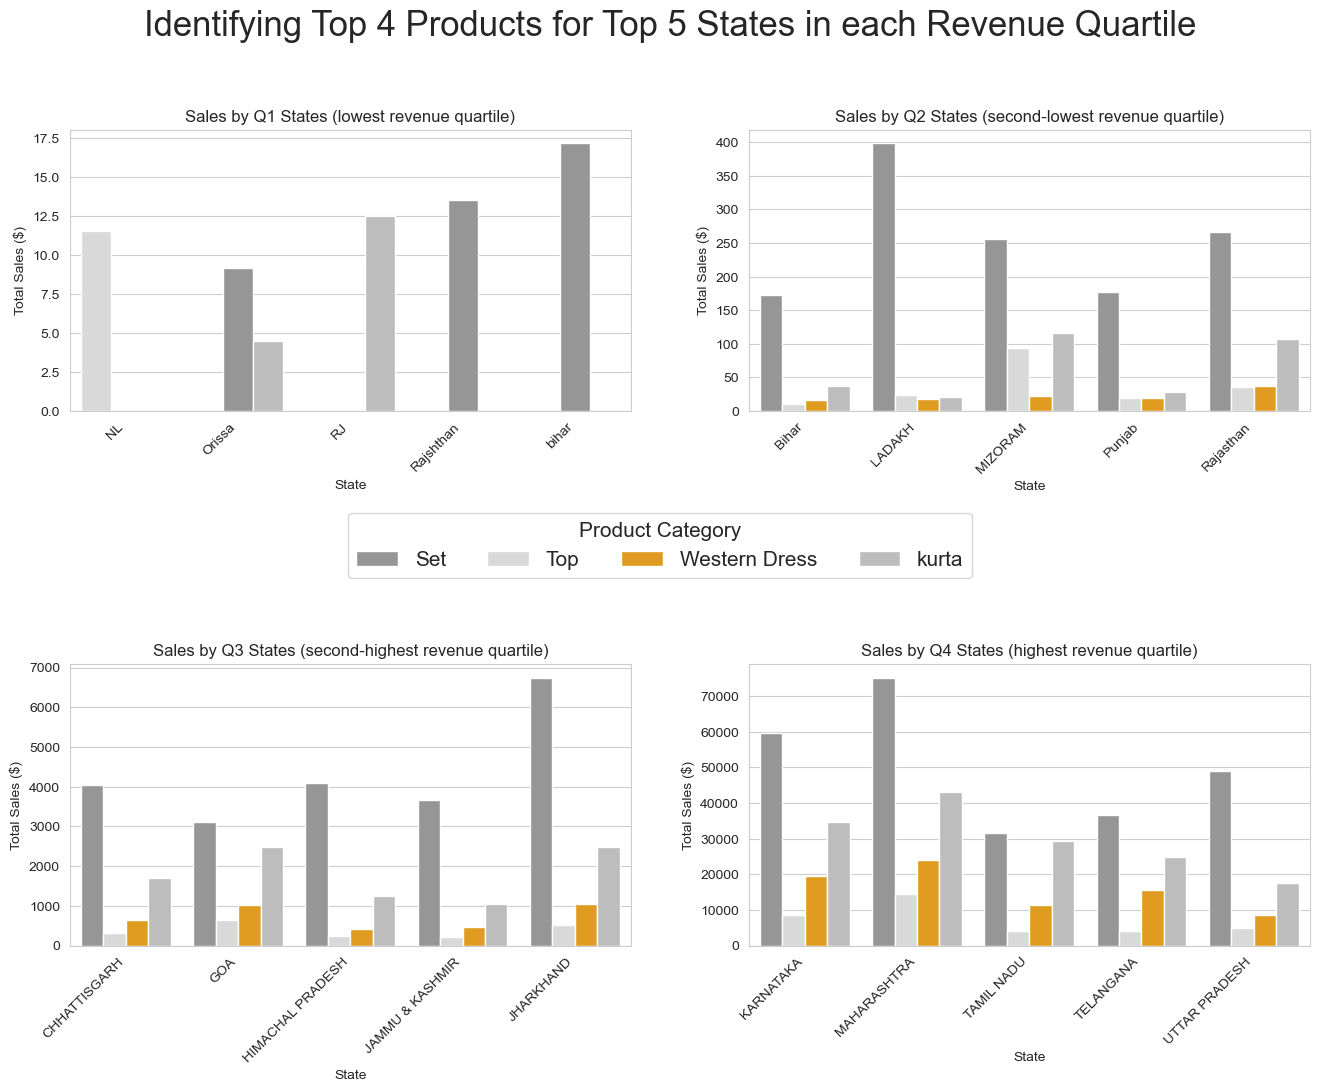

In [111]:
#Define the color palette for the product categories
colors = {'Top': '#d9d9d9', 'Set': '#969696', 'kurta': '#bdbdbd', 'Western Dress':'orange'}

# Group the data by state and calculate the total sales
sales_by_state = amazon_df.groupby('state')['order_amount_($)'].sum()

# Get the top 5 and bottom 5 states by sales
n_states = len(sales_by_state)
quartiles = pd.qcut(sales_by_state, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
top_states = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_states += sales_by_state[quartiles == q].nlargest(5).index.tolist()

# Filter the dataframe to include only the top states
top_sales = amazon_df[amazon_df['state'].isin(top_states)]

# Group the data by state and product, and calculate the total sales
sales_by_state_product = top_sales.groupby(['state', 'product_category'])['order_amount_($)'].sum().reset_index()

# Get the top 3 products for each quartile
top_products = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount_($)'))['product_category'].tolist()

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

# Create the subplot for quartile 1
q1_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q1'].index)]
q1_sales = q1_sales[q1_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q1_sales, ax=axs[0, 0], palette=colors)
axs[0, 0].legend().set_visible(False)
axs[0, 0].set_title('Sales by Q1 States (lowest revenue quartile)')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 2
q2_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q2'].index)]
q2_sales = q2_sales[q2_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q2_sales, palette=colors, ax=axs[0, 1])
axs[0, 1].legend().set_visible(False)
axs[0, 1].set_title('Sales by Q2 States (second-lowest revenue quartile)')
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 3
q3_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q3'].index)]
q3_sales = q3_sales[q3_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q3_sales, palette=colors, ax=axs[1, 0])
axs[1, 0].legend().set_visible(False)
axs[1, 0].set_title('Sales by Q3 States (second-highest revenue quartile)')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 4
q4_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q4'].index)]
q4_sales = q4_sales[q4_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q4_sales, palette=colors, ax=axs[1, 1])
axs[1, 1].legend().set_visible(False)
axs[1, 1].set_title('Sales by Q4 States (highest revenue quartile)')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Total Sales ($)')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)

# Rotate the x-axis tick labels
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add a single legend to the figure
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(labels), title='Product Category', fontsize=15, title_fontsize = 15)
    
    
plt.suptitle("Identifying Top 4 Products for Top 5 States in each Revenue Quartile", fontsize = 25)
# Show the figure
plt.show()
fig.savefig('Top_Products_Top_States.png', dpi=300)
